In [15]:
# import functions
import os                                                                       # work with absolute directory path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import missingno as msno                                                        # visualize missing data
from statsmodels.stats.outliers_influence import variance_inflation_factor      # compute VIF

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.io as pio
from sklearn.impute import SimpleImputer
from tabulate import tabulate                                                   # latex table

# set display and graphics
pd.set_option('display.max_columns', None)  
sns.set(style = "whitegrid")                                                    # set the style for the plot
sns.set_context("paper")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"                                 # display output for all lines within a cell

# define working directory path
path_workdir = '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project'
path_fig = '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/Paper/figure'

In [4]:
# Load data file
dfa = pd.read_csv('/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/add1120_prep3.csv')
dfa = dfa.drop_duplicates(subset='mepsid')      # get unique cases
dfa = dfa.drop('mepsid', axis=1)                # drop case identifier

# Machine learning classification

ML Pre-process

In [5]:
# create dataframe
df_ml = dfa

# create all numeric data frame
object_columns = df_ml.select_dtypes(include=['object'])          # Select columns with the "object" data type
dummy_columns = pd.get_dummies(object_columns)                    # Get dummy variables for the selected columns 
df_ml = df_ml.drop(object_columns, axis=1)                        # Drop the object variables
df_mlnum = pd.concat([df_ml, dummy_columns], axis = 1)            # Concatenate the dummy columns with the original DataFrame
#   df_mlnum = df_mlnum.drop('hinotcov_No', axis=1)                   # Drop negation of target 
print(df_mlnum.dtypes)

age                                                float64
famsize                                            float64
ftotincmeps                                        float64
inctot                                             float64
ftotval                                            float64
                                                    ...   
povcat_High income (>=400% of poverty line)          uint8
povcat_Low income (125-199% of poverty line)         uint8
povcat_Middle income (200-399% of poverty line)      uint8
povcat_Near poor (100-124% of poverty line)          uint8
povcat_Negative or poor (<100% of poverty line)      uint8
Length: 87, dtype: object


ML setup

In [6]:
# Create numpy arrays for feature and target
X = df_mlnum.drop('hinotcov_Yes',axis=1).values               # feature
Y = df_mlnum['hinotcov_Yes'].values                           # target

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape
Y.shape

# Create test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 111)   

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

X_train.shape
Y_train.shape

(184573, 86)

(184573,)

(147658, 86)

(147658,)

# KNN ML classification

Experiment with different values of K and weight parameters

KNeighborsClassifier()

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=9, weights='distance')

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=10, weights='distance')

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=11, weights='distance')

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=12, weights='distance')

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=13, weights='distance')

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=14, weights='distance')

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=15, weights='distance')

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=16, weights='distance')

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=17, weights='distance')

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=18, weights='distance')

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=19, weights='distance')

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=20, weights='distance')

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'KNN Classifier Accuracy for Different K Values and Weighting Schemes')

Text(0.5, 0, 'Number of Neighbors (K)')

Text(0, 0.5, 'Accuracy')

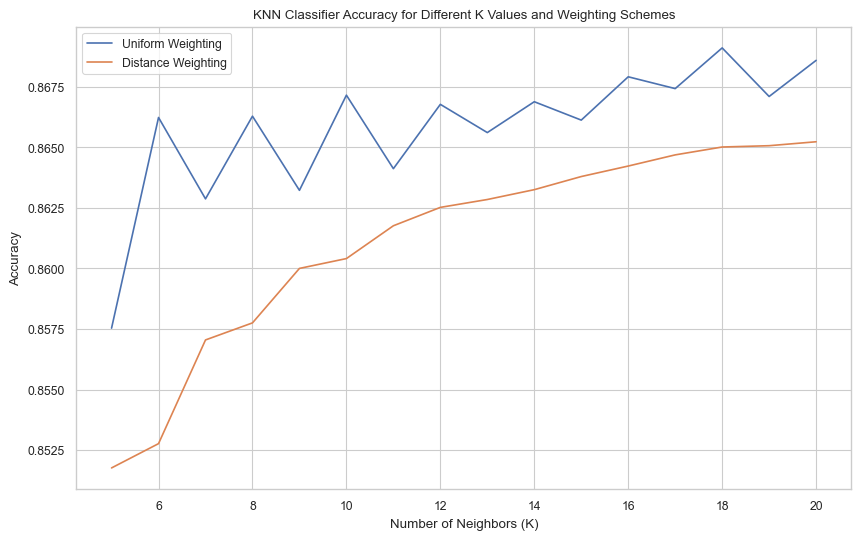

In [7]:
k_values = range(5, 21)
accuracy_uniform_knn = []
accuracy_distance_knn = []

for k in k_values:
    # Uniform weighting
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, Y_train)
    Y_pred_uniform = knn_uniform.predict(X_test)
    accuracy_uniform_knn.append(accuracy_score(Y_test, Y_pred_uniform))

    # Distance weighting
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, Y_train)
    Y_pred_distance = knn_distance.predict(X_test)
    accuracy_distance_knn.append(accuracy_score(Y_test, Y_pred_distance))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_uniform_knn, label='Uniform Weighting')
plt.plot(k_values, accuracy_distance_knn, label='Distance Weighting')
plt.title('KNN Classifier Accuracy for Different K Values and Weighting Schemes')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
# Save the plot
plt.savefig(os.path.join(path_fig, 'knn_k_weight.png'))
plt.show()

Find the best parameters

In [8]:
best_k_uniform = k_values[np.argmax(accuracy_uniform_knn)]
best_k_distance = k_values[np.argmax(accuracy_distance_knn)]

print(f"Best K for Uniform Weighting: {best_k_uniform}")
print(f"Best K for Distance Weighting: {best_k_distance}")

Best K for Uniform Weighting: 18
Best K for Distance Weighting: 20


Train a new KNN classifier with the best parameters

In [9]:
best_knn_uniform = KNeighborsClassifier(n_neighbors=best_k_uniform, weights='uniform')
best_knn_uniform.fit(X_train, Y_train)
accuracy_train_uniform_knn = accuracy_score(Y_train, best_knn_uniform.predict(X_train))
accuracy_test_uniform_knn_best = accuracy_score(Y_test, best_knn_uniform.predict(X_test))

best_knn_distance = KNeighborsClassifier(n_neighbors=best_k_distance, weights='distance')
best_knn_distance.fit(X_train, Y_train)
accuracy_train_distance_knn = accuracy_score(Y_train, best_knn_distance.predict(X_train))
accuracy_test_distance_knn = accuracy_score(Y_test, best_knn_distance.predict(X_test))

# Report the accuracy of the best classifiers
print("\nAccuracy of the Best KNN Classifier with Uniform Weighting:")
print(f"Training Set: {accuracy_train_uniform_knn:.4f}")
print(f"Test Set: {accuracy_test_uniform_knn_best:.4f}")

print("\nAccuracy of the Best KNN Classifier with Distance Weighting:")
print(f"Training Set: {accuracy_train_distance_knn:.4f}")
print(f"Test Set: {accuracy_test_distance_knn:.4f}")

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=20, weights='distance')


Accuracy of the Best KNN Classifier with Uniform Weighting:
Training Set: 0.8757
Test Set: 0.8691

Accuracy of the Best KNN Classifier with Distance Weighting:
Training Set: 0.9997
Test Set: 0.8652


Experiment with different values of K with uniform weight parameters

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=35)

KNeighborsClassifier(n_neighbors=36)

KNeighborsClassifier(n_neighbors=37)

KNeighborsClassifier(n_neighbors=38)

KNeighborsClassifier(n_neighbors=39)

KNeighborsClassifier(n_neighbors=40)

KNeighborsClassifier(n_neighbors=41)

KNeighborsClassifier(n_neighbors=42)

KNeighborsClassifier(n_neighbors=43)

KNeighborsClassifier(n_neighbors=44)

KNeighborsClassifier(n_neighbors=45)

KNeighborsClassifier(n_neighbors=46)

KNeighborsClassifier(n_neighbors=47)

KNeighborsClassifier(n_neighbors=48)

KNeighborsClassifier(n_neighbors=49)

KNeighborsClassifier(n_neighbors=50)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'KNN Classifier Accuracy for Different K Values with Uniform Weighting')

Text(0.5, 0, 'Number of Neighbors (K)')

Text(0, 0.5, 'Accuracy')

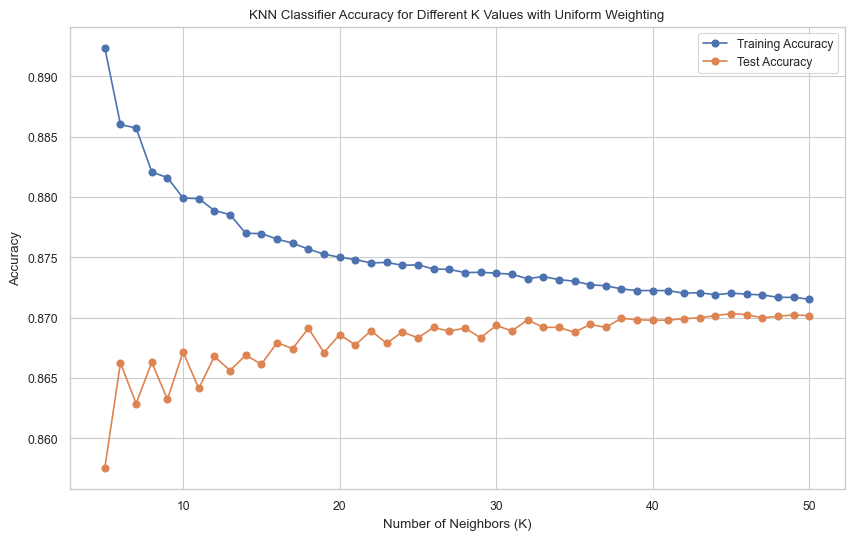

In [10]:
k_values = range(5, 51)
accuracy_train_uniform_knn = []
accuracy_test_uniform_knn = []

for k in k_values:
    # Uniform weighting
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, Y_train)
    
    # Predictions on training and test sets
    Y_train_pred_uniform = knn_uniform.predict(X_train)
    Y_test_pred_uniform = knn_uniform.predict(X_test)
    
    # Accuracy for training and test sets
    accuracy_train_uniform_knn.append(accuracy_score(Y_train, Y_train_pred_uniform))
    accuracy_test_uniform_knn.append(accuracy_score(Y_test, Y_test_pred_uniform))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_train_uniform_knn, label='Training Accuracy', marker='o')
plt.plot(k_values, accuracy_test_uniform_knn, label='Test Accuracy', marker='o')
plt.title('KNN Classifier Accuracy for Different K Values with Uniform Weighting')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
# Save the plot
plt.savefig(os.path.join(path_fig, 'knn_accuracy.png'))
plt.show()

Use the best parameters to run the classifier using training data set and evaluate with test data set. 

In [12]:
best_k_uniform = k_values[np.argmax(accuracy_uniform_knn)]

knn_uniform = KNeighborsClassifier(
    n_neighbors=best_k_uniform, weights='uniform')             # Run the classifier with the best parameters
knn_uniform.fit(X_train, Y_train)                              # Train the classifier on the training dataset                                
Y_pred_train = knn_uniform.predict(X_train)                    # Make predictions on the training set
train_accuracy = accuracy_score(Y_train, Y_pred_train)         # Evaluate training accuracy
print("Training Accuracy:", train_accuracy)
Y_pred_test = knn_uniform.predict(X_test)                         # Make predictions on the test set
test_accuracy = accuracy_score(Y_test, Y_pred_test)            # Evaluate test accuracy
print("Test Accuracy:", test_accuracy)

KNeighborsClassifier(n_neighbors=18)

Training Accuracy: 0.8756721613458126
Test Accuracy: 0.8691046999864553


Cross-table (confusion matrix) with true and predicted labels from test data

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix (Training Set)')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix (Test Set)')

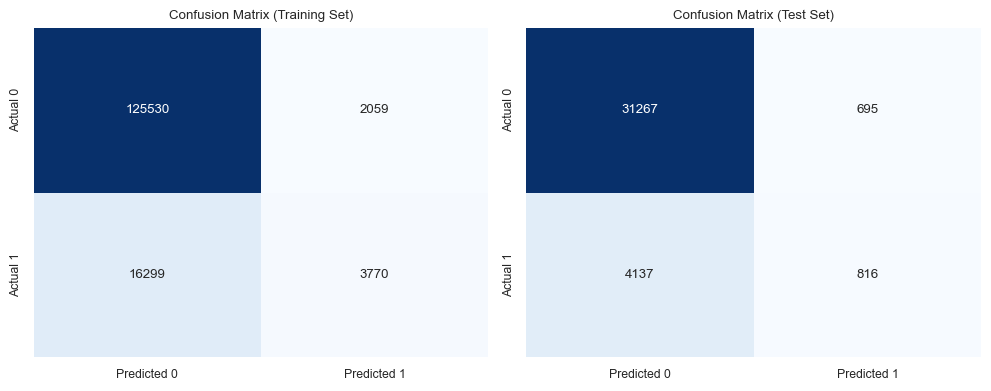

<Figure size 640x480 with 0 Axes>

In [13]:
conf_matrix_train = confusion_matrix(Y_train, Y_pred_train)              # Confusion Matrix for training data
class_report_train = classification_report(Y_train, Y_pred_train)        # Classification Report for training data
conf_matrix_test = confusion_matrix(Y_test, Y_pred_test)                 # Confusion Matrix for test data
class_report_test = classification_report(Y_test, Y_pred_test)           # Classification Report for test data

# Visualize Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Training Set)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Test Set)')

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(path_fig, 'knn_confmat.png'))

Accuracy, sensitivity and specificity

In [16]:
def calculate_metrics(conf_matrix):                                         # Define a function to calculate sensitivity and specificity
    true_positives = conf_matrix[1, 1]
    false_positives = conf_matrix[0, 1]
    true_negatives = conf_matrix[0, 0]
    false_negatives = conf_matrix[1, 0]

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    return accuracy, sensitivity, specificity


accuracy_train, sensitivity_train, specificity_train = calculate_metrics(conf_matrix_train)     # Calculate metrics for training set


accuracy_test, sensitivity_test, specificity_test = calculate_metrics(conf_matrix_test)         # Calculate metrics for test set


print("Training Set Metrics:")                                                                  # Print the results
print("Accuracy:", accuracy_train)
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)

accuracy_train, sensitivity_train, specificity_train = calculate_metrics(conf_matrix_train)
accuracy_test, sensitivity_test, specificity_test = calculate_metrics(conf_matrix_test)

# Create a table in LaTeX format
table_data = [['Metric', 'Training Set', 'Test Set'],
              ['Accuracy', accuracy_train, accuracy_test],
              ['Sensitivity', sensitivity_train, sensitivity_test],
              ['Specificity', specificity_train, specificity_test]]

table_latex = tabulate(table_data, tablefmt="latex_raw")

file_path = os.path.join(path_fig, 'knn_table_acc_sens_spec.tex')     # Specify the file path using os.path.join
with open(file_path, 'w') as file:
    file.write(table_latex)                                          # Save the LaTeX table to the specified file path
print(f"Table saved to '{file_path}'")

Training Set Metrics:
Accuracy: 0.8756721613458126
Sensitivity: 0.18785191090736958
Specificity: 0.9838622451778758

Test Set Metrics:
Accuracy: 0.8691046999864553
Sensitivity: 0.16474863718958208
Specificity: 0.9782554283211313


288

Table saved to '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/Paper/figure/knn_table_acc_sens_spec.tex'
